In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load your dataset
data = pd.read_csv('train_data.csv', sep=':::', engine='python', header=None,names=['ID', 'Title', 'Genre', 'Plot'])
# Preprocess the text data (cleaning, tokenization, etc.)
# You may need to define a function for text preprocessing

# Split the data into features (X) and labels (y)
X = data['Plot']
y = data['Genre']

In [3]:
# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Naive Bayes (MultinomialNB) classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict the genres on the testing data using Naive Bayes
y_nb_pred = nb_classifier.predict(X_test)

# Evaluate Naive Bayes performance
accuracy_nb = accuracy_score(y_test, y_nb_pred)
classification_rep_nb = classification_report(y_test, y_nb_pred, zero_division='warn')  # Set zero_division parameter

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_rep_nb)

Naive Bayes Accuracy: 0.4733007470257309
Naive Bayes Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.26      0.34      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.89      0.66      2659
       drama        0.41      0.83      0.55      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.05      0.10        40
     history        0.00      0.00      0.00        45
      horror        0.80      0.09      0.16       431
       music        0.75      0.04      0.08       144
     musical        0.00      0.00      0.0

C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


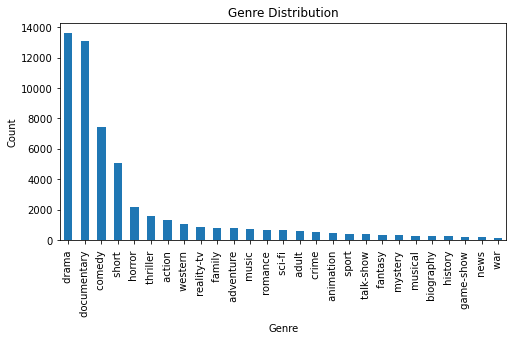

In [4]:
# Visualize the data (example: class distribution)
plt.figure(figsize=(8, 4))
data['Genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [5]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict the genres on the testing data using SVM
y_svm_pred = svm_classifier.predict(X_test)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_svm_pred)
classification_rep_svm = classification_report(y_test, y_svm_pred, zero_division='warn')  # Set zero_division parameter

print("\nSVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_rep_svm)


SVM Accuracy: 0.551415659872729
SVM Classification Report:
               precision    recall  f1-score   support

      action        0.40      0.18      0.25       263
       adult        0.69      0.18      0.28       112
   adventure        0.33      0.06      0.10       139
   animation        0.33      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.46      0.52      0.49      1443
       crime        0.50      0.01      0.02       107
 documentary        0.64      0.86      0.73      2659
       drama        0.50      0.78      0.61      2697
      family        0.50      0.09      0.15       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.38      0.55        40
     history        0.00      0.00      0.00        45
      horror        0.60      0.48      0.54       431
       music        0.66      0.38      0.48       144
     musical        0.00      0.00      0.00        50
    

C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


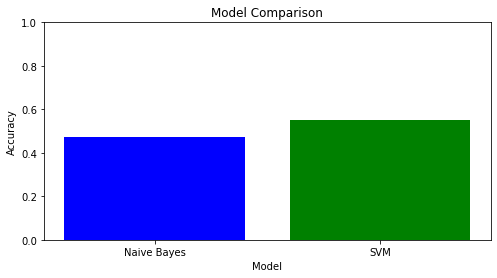

In [6]:
# Visualize model comparison
plt.figure(figsize=(8, 4))
models = ['Naive Bayes', 'SVM']
accuracies = [accuracy_nb, accuracy_svm]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()